[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/dylanh05/pyDFT/edit/master/1DDFT.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DFT:
    # Grid must be a np.linspace with function of same shape applied to the grid
    # v_ext is the applied potential to the grid (only supports harmonic oscillator at this point)
    # v_ext = 'harmonic' applies harmonic oscillator to the Hamiltonian
    def __init__(self, grid, function, v_ext):
        self.grid = grid
        self.function = function
        self.v_ext = v_ext

    # Assumes grid has all unique values
    def get_index(self, value):
        return np.where(self.grid==value)[0][0]

    # Computes numerical derivatives of function on grid at given index
    def deriv(self, ind):
        return (self.function[ind+1]-self.function[ind-1])/(self.grid[ind+1]-self.grid[ind-1])

    # Computes numerical second derivatives of function on grid at given index
    def deriv2(self, ind):
        return (self.deriv(ind+1)-self.deriv(ind-1))/(self.grid[ind+1]-self.grid[ind-1])

    # Returns grids of first and second derivatives of function on grid
    def compute_derivs(self):
        first_derivs = np.zeros(self.grid.size)
        second_derivs = np.zeros(self.grid.size)
        for i in range(2, self.grid.size-2):
            first_derivs[i] = self.deriv(i)
            second_derivs[i] = self.deriv2(i)
        return first_derivs, second_derivs

    # Function prototype to multiply element by zero
    def times_zero(self, element):
        return element*0

    # Applies NxN operator to grid  
    def linear_operator(self, operator):
        return np.dot(operator, self.function)


    # Gives the matrix representation of the kinetic operator applied to function over a grid
    def kinetic_operator(self):
        operator = np.zeros((self.grid.size, self.grid.size))          # Maybe zeros
        #for i in range(0, self.function.size):                        # Maybe 
        #    for j in range(0, self.function.size):                    # Maybe
        #        operator[i][j] = self.times_zero(self.function[i])    # Maybe
        for i in range(1, self.function.size-2):
            operator[i][i] = (-1/2)*self.deriv2(i)                     # Maybe need to change this to operator
        return operator

    # Returns the external potential chosen as a matrix to apply to the hamiltonian
    def external_potential(self):
        operator = np.zeros((self.grid.size, self.grid.size))         
        if self.v_ext == "harmonic":
            for i in range(0, self.grid.size):
                operator[i][i] = self.grid[i]*self.grid[i]            # Maybe need to change this to self.grid[i]
            return operator
        print("External potential chosen: " + str(self.v_ext) + " not yet supported")


    # Uses simple kinetic operator as the diagonalized Hamiltonian and computes Kohm Sham states
    def compute_Kohm_Sham_states(self):
        Hamiltonian = self.kinetic_operator() + self.external_potential()
        epsilon_n, psi_gn = np.linalg.eigh(Hamiltonian)
        return epsilon_n, psi_gn

    # Integrates inputted wavefunction over the DFT grid, return area under curve
    def integrate(self, wavefunction):
        dh = self.grid[1]-self.grid[0]
        area = 0
        for i in range(0, self.grid.size):
            area += wavefunction[i]*dh
        return area
    
    # Normalizes all states in psi_gn
    def normalize(self, psi_gn):
        for i in range(self.grid.size):
          area = self.integrate((psi_gn[i])**2)
          psi_gn[i] = np.sqrt(psi_gn[i]**2)/area
        return psi_gn

    # Plots a state at a given index and the energy associated with it
    def plot_wavefuction(self, epsilon_n, psi_gn, ind):
        print("Energy: " + str(epsilon_n[ind]))
        plt.plot(psi_gn[:, ind])
        plt.show()


In [3]:
x = np.linspace(-50, 50, 2000)
print("1D Space:")
print(x)

1D Space:
[-50.         -49.94997499 -49.89994997 ...  49.89994997  49.94997499
  50.        ]


In [4]:
y = x
print("Function:")
print(y)

Function:
[-50.         -49.94997499 -49.89994997 ...  49.89994997  49.94997499
  50.        ]


In [5]:
State = DFT(x, y, "harmonic")
first_derivs, second_derivs = State.compute_derivs()

In [6]:
epsilon_n, psi_gn = State.compute_Kohm_Sham_states()

Energy: 157.0326183602056


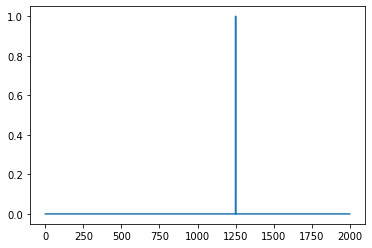

In [7]:
State.plot_wavefuction(epsilon_n, psi_gn, 500)

In [8]:
State.normalize(psi_gn)
print(psi_gn)
print(State.integrate(psi_gn[50]))

[[ 0.    0.    0.   ...  0.   19.99  0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ... 19.99  0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.   19.99]]
1.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

